# *Exploratory Data Analysis on Sachin Tendulkar's ODI Career*

### 🔧 Import Required Libraries

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import requests
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

### 🔵Seaborn & Matplotlib Theme

In [98]:
sns.set_theme(style="whitegrid", palette="deep")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["axes.edgecolor"] = "gray"
plt.rcParams["axes.linewidth"] = 1.2

### 📥 Load the Dataset

In [100]:
df = pd.read_csv("sachin_odi.csv")
df.head(10)

,batting_score,wickets,runs_conceded,catches,stumps,opposition,ground,date,match_result,result_margin,toss,batting_innings
0,0,-,-,0,0,v Pakistan,Gujranwala,18-Dec-89,lost,7 runs,won,2nd
1,0,-,-,0,0,v New Zealand,Dunedin,01-Mar-90,lost,108 runs,won,2nd
2,36,-,-,0,0,v New Zealand,Wellington,06-Mar-90,won,1 runs,won,1st
3,10,-,-,1,0,v Sri Lanka,Sharjah,25-Apr-90,lost,3 wickets,lost,1st
4,20,-,-,0,0,v Pakistan,Sharjah,27-Apr-90,lost,26 runs,won,2nd
5,19,-,-,0,0,v England,Leeds,18-Jul-90,won,6 wickets,won,2nd
6,31,0,10,0,0,v England,Nottingham,20-Jul-90,won,5 wickets,won,2nd
7,36,-,-,0,0,v Sri Lanka,Nagpur,01-Dec-90,won,19 runs,lost,1st
8,53,2,39,2,0,v Sri Lanka,Pune,05-Dec-90,won,6 wickets,won,2nd
9,30,-,-,0,0,v Sri Lanka,Margao,08-Dec-90,lost,7 wickets,won,1st


### 🧹 Data Cleaning and Feature Engineering

#### Batting Score Cleanup

In [103]:
df['not_out'] = df['batting_score'].astype(str).str.contains('*', regex=False)
df['batting_score_clean'] = df['batting_score'].replace('[^0-9]', '', regex=True)
df['batting_score_clean'] = pd.to_numeric(df['batting_score_clean'], errors='coerce')
df.batting_score_clean.head(20)

0      0.0
1      0.0
2     36.0
3     10.0
4     20.0
5     19.0
6     31.0
7     36.0
8     53.0
9     30.0
10     NaN
11     4.0
12    53.0
13    52.0
14    22.0
15    11.0
16    49.0
17     0.0
18    62.0
19     4.0
Name: batting_score_clean, dtype: float64

#### Wickets Cleanup

In [105]:
df['new_wickets'] = df['wickets'].replace('-', np.nan).astype(float)
df.new_wickets.head(20)

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     0.0
7     NaN
8     2.0
9     NaN
10    0.0
11    NaN
12    NaN
13    NaN
14    NaN
15    4.0
16    0.0
17    0.0
18    1.0
19    0.0
Name: new_wickets, dtype: float64

#### Other numerical columns

In [107]:
df['runs_conceded'] = pd.to_numeric(df['runs_conceded'], errors='coerce')
print('Runs Conceded:\n',df.runs_conceded.head(20))
df['catches'] = pd.to_numeric(df['catches'], errors='coerce')
print('Catches:\n',df.catches.head(20))
df['stumps'] = pd.to_numeric(df['stumps'], errors='coerce')
print('Stumps:\n',df.stumps.head(20))

Runs Conceded:
 0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6     10.0
7      NaN
8     39.0
9      NaN
10    15.0
11     NaN
12     NaN
13     NaN
14     NaN
15    34.0
16    20.0
17    24.0
18    27.0
19    31.0
Name: runs_conceded, dtype: float64
Catches:
 0     0.0
1     0.0
2     0.0
3     1.0
4     0.0
5     0.0
6     0.0
7     0.0
8     2.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    1.0
17    0.0
18    0.0
19    0.0
Name: catches, dtype: float64
Stumps:
 0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
Name: stumps, dtype: float64


## 📊 Univariate Analysis 

### Batting Score Distribution

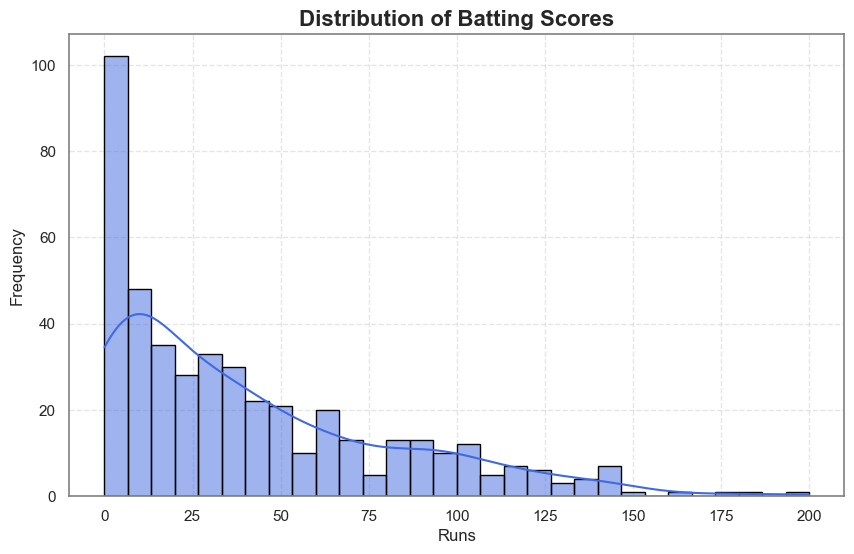

In [179]:
plt.figure(figsize=(10,6))
sns.histplot(df['batting_score_clean'].dropna(), 
             bins=30, kde=True, color='royalblue', edgecolor='black')
plt.title("Distribution of Batting Scores", fontsize=16, weight='bold')
plt.xlabel("Runs", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig("Distribution_Of_Batting_Score.png")
plt.show()

##### Centuries and Half Centuries

In [112]:
centuries = df[df['batting_score_clean'] >= 100].shape[0]
half_centuries = df[(df['batting_score_clean'] >= 50) & (df['batting_score_clean'] < 100)].shape[0]
print(f"Total Centuries: {centuries}")
print(f"Total Half Centuries: {half_centuries}")

Total Centuries: 49
Total Half Centuries: 96


### Wickets Taken

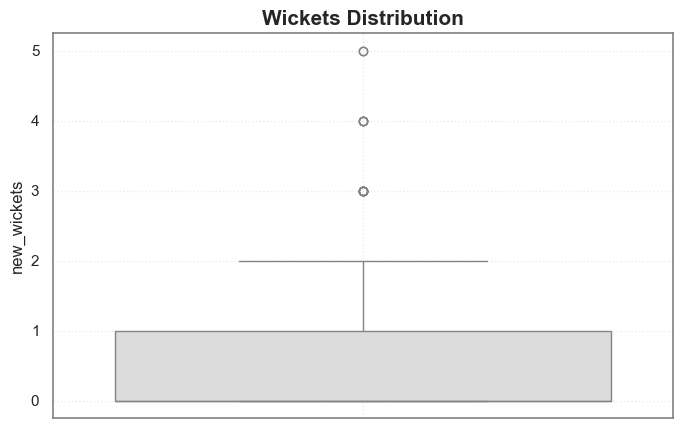

In [181]:
plt.figure(figsize=(8,5))
sns.boxplot(df['new_wickets'], color='gainsboro')
plt.title("Wickets Distribution", fontsize=15, weight='bold')
plt.grid(True, linestyle=':', alpha=0.4)
plt.savefig("Wickets_Distribution.png")
plt.show()

### 🔥. Runs_Conceded

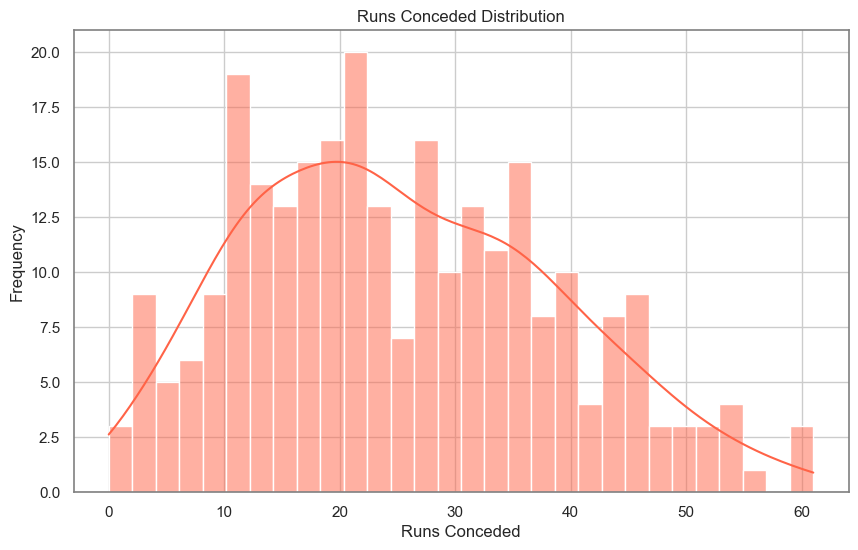

In [183]:
df['runs_conceded'] = pd.to_numeric(df['runs_conceded'], errors='coerce')
plt.figure(figsize=(10,6))
sns.histplot(df['runs_conceded'].dropna(), bins=30, kde=True, color='tomato')
plt.title("Runs Conceded Distribution")
plt.xlabel("Runs Conceded")
plt.ylabel("Frequency")
plt.grid(True)
plt.savefig("Runs_Conceded_Distribution.png")
plt.show()

### 🧤 Catches

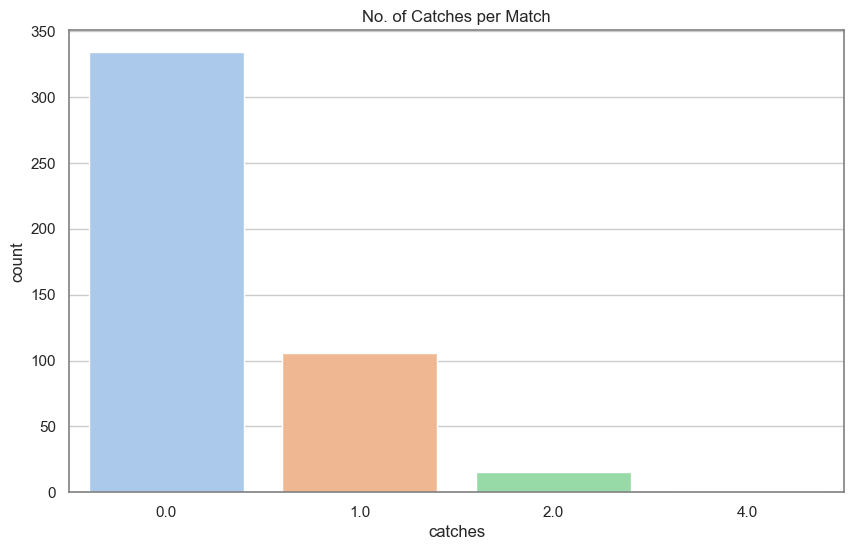

In [185]:
df['catches'] = pd.to_numeric(df['catches'], errors='coerce')
sns.countplot(x='catches', data=df, palette='pastel')
plt.title("No. of Catches per Match")
plt.savefig("Number_of_catches_per_match.png")
plt.show()

### 🌍 Opposition

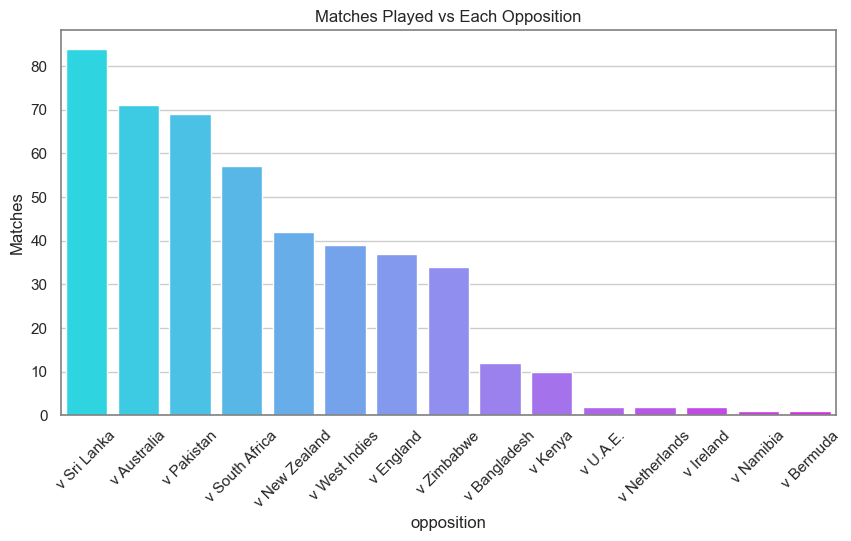

In [187]:
oppo_counts = df['opposition'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=oppo_counts.index, y=oppo_counts.values, palette='cool')
plt.title("Matches Played vs Each Opposition")
plt.ylabel("Matches")
plt.xticks(rotation=45)
plt.savefig("Matches_played_VS_each_opposition.png")
plt.show()

### 🏟  Ground

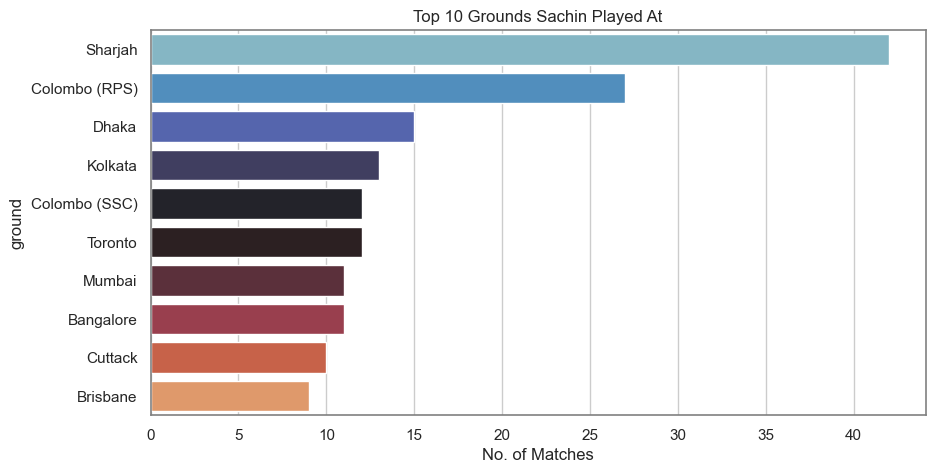

In [189]:
top_grounds = df['ground'].value_counts().nlargest(10)
plt.figure(figsize=(10,5))
sns.barplot(y=top_grounds.index, x=top_grounds.values, palette='icefire')
plt.title("Top 10 Grounds Sachin Played At")
plt.xlabel("No. of Matches")
plt.savefig("Top_10_Grounds_Sachin_Played_At.png")
plt.show()

### 🪙 Toss

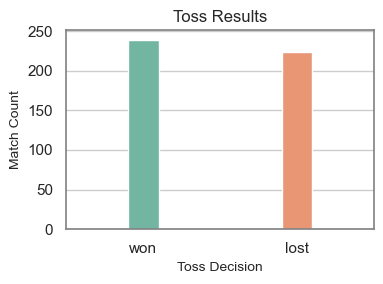

In [191]:
plt.figure(figsize=(4, 3))
sns.countplot(x='toss', data=df, palette='Set2', width=0.2)
plt.title("Toss Results", fontsize=12)
plt.xlabel("Toss Decision", fontsize=10)
plt.ylabel("Match Count", fontsize=10)
plt.tight_layout()
plt.savefig("Toss_Results.png")
plt.show()

### 🏏 Batting Innings

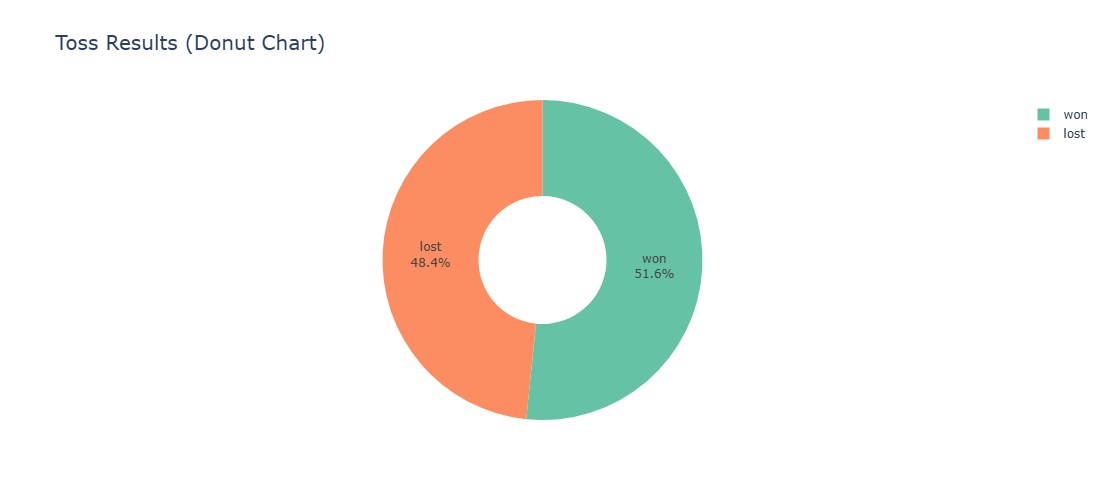

<Figure size 1000x600 with 0 Axes>

In [193]:
import plotly.express as px

fig = px.pie(names=df['toss'].value_counts().index,
             values=df['toss'].value_counts().values,
             title='Toss Results (Donut Chart)',
             hole=0.4,
             color_discrete_sequence=px.colors.qualitative.Set2)

fig.update_traces(textinfo='percent+label')
fig.update_layout(
    title_font_size=20,
    height=500, 
    width=600    
)
plt.savefig("Toss_Results(1).png")
fig.show()

### 📅  Analyzed Over Time

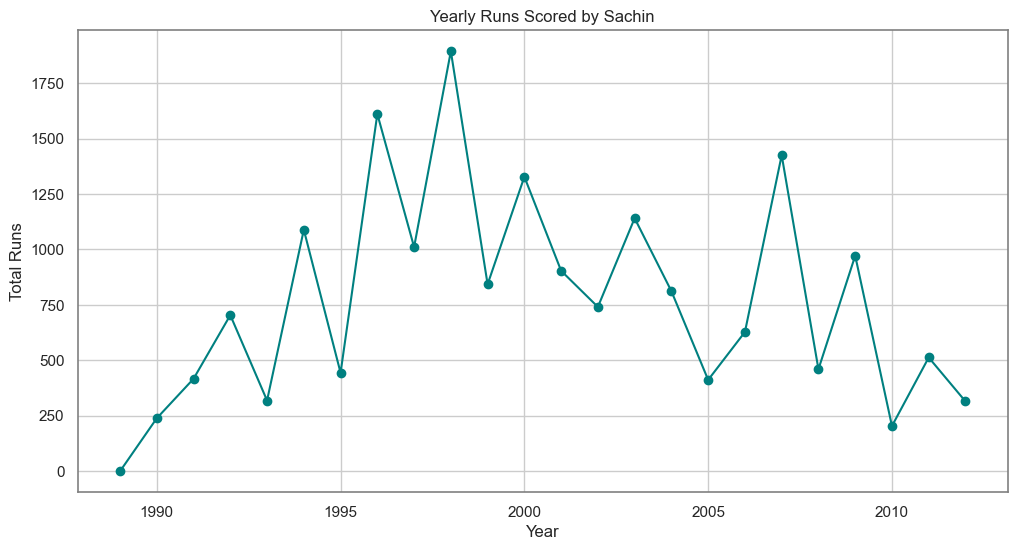

In [195]:
df['date'] = pd.to_datetime(df['date'])
plt.figure(figsize=(12,6))
df.groupby(df['date'].dt.year)['batting_score_clean'].sum().plot(color='teal', marker='o')
plt.title("Yearly Runs Scored by Sachin")
plt.xlabel("Year")
plt.ylabel("Total Runs")
plt.grid(True)
plt.savefig("Yearly_runs_scored_by_Sachin.png")
plt.show()

## 📈  Multivariate Analysis

### Performance by Match Result

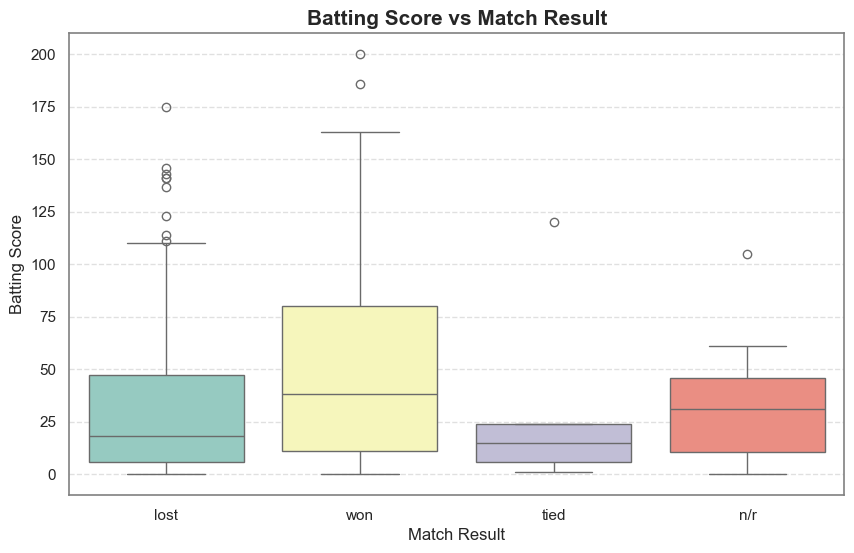

In [197]:
sns.boxplot(data=df, x='match_result', y='batting_score_clean', palette='Set3')
plt.title("Batting Score vs Match Result", fontsize=15, weight='bold')
plt.xlabel("Match Result")
plt.ylabel("Batting Score")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.savefig("Batting_Score_VS_Match_Result.png")
plt.show()

### 🏁 Match Result

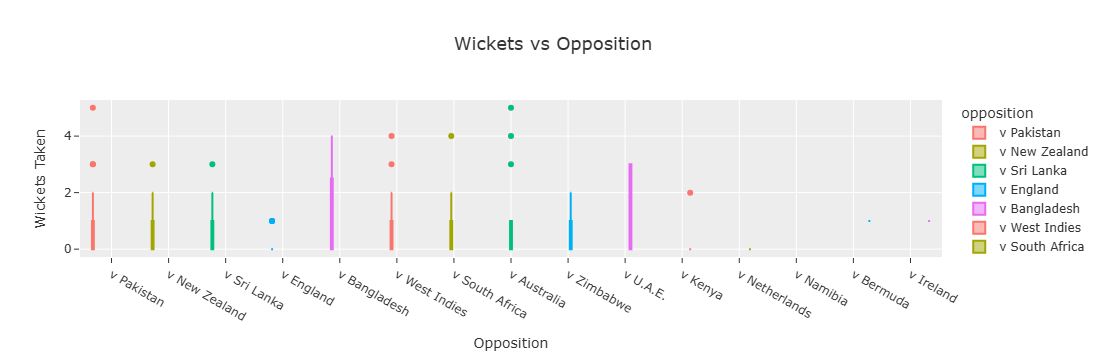

<Figure size 1000x600 with 0 Axes>

In [199]:
fig = px.box(df, 
             x='opposition', y='new_wickets', 
             color='opposition', 
             title="Wickets vs Opposition",
             template='ggplot2') 
fig.update_layout(
    title_font_size=18,
    xaxis_title="Opposition",
    yaxis_title="Wickets Taken",
    boxmode='group')
plt.savefig("Wickets_VS_Opposition.png")
fig.show()

### Heatmap of Contribution

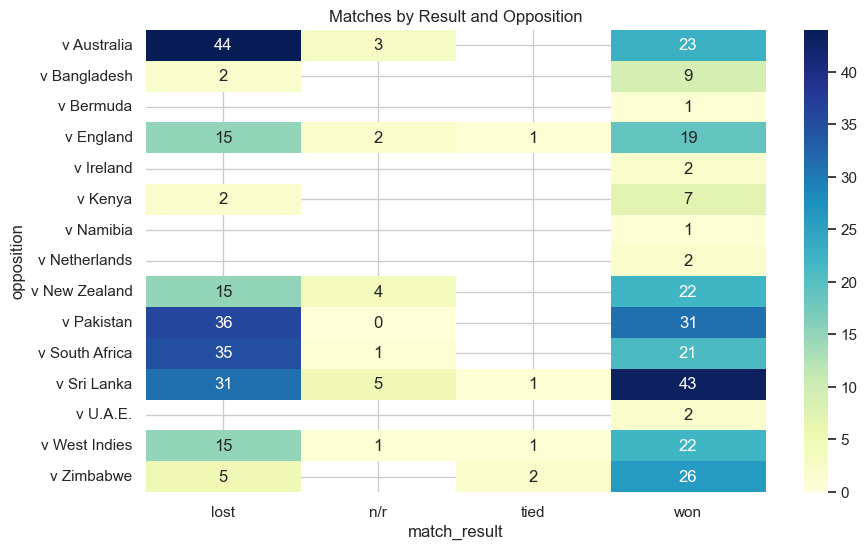

In [201]:
pivot = pd.pivot_table(df, values='batting_score_clean', index='opposition', columns='match_result', aggfunc='count')
sns.heatmap(pivot, annot=True, cmap='YlGnBu')
plt.title("Matches by Result and Opposition")
plt.savefig("Matches_by_Result_and_Opposition.png")
plt.show()

## 📋 Summary Statistics

In [137]:
print("Total Matches Played:", df.shape[0])
print("Total Runs Scored:", df['batting_score_clean'].sum())
print("Average Runs:", df['batting_score_clean'].mean())
print("Total Wickets:", df['new_wickets'].sum())
print("Max Wickets in a Match:", df['new_wickets'].max())
print("Total Catches:", df['catches'].sum())
print("Total Stumpings:", df['stumps'].sum())

Total Matches Played: 463
Total Runs Scored: 18426.0
Average Runs: 40.76548672566372
Total Wickets: 154.0
Max Wickets in a Match: 5.0
Total Catches: 140.0
Total Stumpings: 0.0


## 🏁 Summary Report

In [139]:
summary = {
    "Total Matches": df.shape[0],
    "Total Runs": df['batting_score_clean'].sum(),
    "Total 100s": centuries,
    "Total 50s": half_centuries,
    "Highest Score": df['batting_score_clean'].max(),
    "Total Wickets": df['new_wickets'].sum(),
    "5-Wicket Hauls": df[df['new_wickets'] >= 5].shape[0],
    "Total Catches": df['catches'].sum(),
    "Total Stumpings": df['stumps'].sum(),
}

for k, v in summary.items():
    print(f"{k}: {v}")


Total Matches: 463
Total Runs: 18426.0
Total 100s: 49
Total 50s: 96
Highest Score: 200.0
Total Wickets: 154.0
5-Wicket Hauls: 2
Total Catches: 140.0
Total Stumpings: 0.0
